<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/My_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras.layers.advanced_activations import ReLU
from keras.layers.advanced_activations import PReLU
from keras.layers import Input, Conv2D, Concatenate
from tensorflow.keras.layers import BatchNormalization

In [2]:
from keras.layers.convolutional import DepthwiseConv2D
img_shape1 = (32,32, 1)
input_img1 = Input(shape=(img_shape1),name = 'X')

In [3]:
from tensorflow.keras.layers import add, Activation

In [4]:
#GhostBlock

#Redundant Feature Maps
C_1 = Conv2D(1, (1, 1), padding='same', name='CONV2D1')(input_img1)
BatchNormalization()
A_1 = Activation('relu', name='act1')(C_1)

#Intrinsic feature Maps
C_2 = DepthwiseConv2D(1, (1, 1), padding='same', name='CONV2D2')(input_img1)
BatchNormalization()
A_2 = Activation('relu', name='act2')(C_2)

#Concatenation Layer
output_img1 = keras.layers.concatenate([A_1, A_2], axis=1)
model1 = Model(input_img1, output_img1)

#ResNet Block
conv1 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(output_img1)
conv2 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='linear')(conv1)
conv3 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='linear')(conv2)

out = add(inputs=[output_img1, conv3])
out = Activation('relu')(out)

model = Model(inputs=input_img1, outputs=out)


In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X (InputLayer)                 [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 CONV2D1 (Conv2D)               (None, 32, 32, 1)    2           ['X[0][0]']                      
                                                                                                  
 CONV2D2 (DepthwiseConv2D)      (None, 32, 32, 1)    2           ['X[0][0]']                      
                                                                                                  
 act1 (Activation)              (None, 32, 32, 1)    0           ['CONV2D1[0][0]']                
                                                                                            

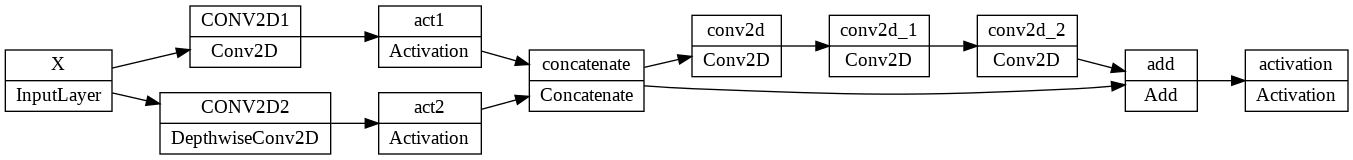

In [5]:

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

